In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

from random import seed
from random import randint


I want to test if lstm can learn getting min and max over a sequence.
I will be creating 2 dimension of 15 time_steps.
I will create Y target variable with min of 1 dimension and max of other.

Also for testing overfitting(memorizing intervals) I will train model in range 0-1000 in 1 model , but for other model I will use numbers in range 0-10000 for validation. Infact this will give bigger errors on training and validation , but network will be more corrective and generalized.
I will do this for 2 types of architecture one for simple single LSTM and other combined ones.






In [0]:
seed(1)
#generate random number with upper bound
def getrand(upper_bound):
  return randint(0, upper_bound)
  
#get min for 1st dimension get max for 2nd dimension  
def generate_min_max(X):
  Y = list()
  for xsub in X:
    new_item = list()
    new_item.append(min(xsub[:,0:1])[0])
    new_item.append(max(xsub[:,1:2])[0])
    Y.append(new_item)

  Y = np.array(Y)
  return Y

#generate random data and shape it according to dimension
#generate a target variable of a timeseris of timesteps
def generare_batch_data(num_sample,time_steps,num_features,upper_bound):  
  Xsub = np.array([getrand(upper_bound) for x in range(num_sample * time_steps * num_features)])    
  X = np.array(Xsub).reshape(num_sample, time_steps, num_features)
  Y = generate_min_max(X)
  return X,Y


#given a history display 10 errors over time
def plot_history(history):
  history.history["mean_absolute_error"]
  indices = [i for i in range(0,len(history.history["mean_absolute_error"]) ,int(len(history.history["mean_absolute_error"]) / 10) )]
  print("error values",np.array(history.history["mean_absolute_error"])[ indices] )

  plt.plot(history.history["mean_absolute_error"], 'ro' ,label = 'training acc')
  plt.plot( history.history["val_mean_absolute_error"], 'b' , label= 'validation acc')
  plt.title('Training and Validation acc')
  plt.legend()
  plt.show()  

#generate random test data and test model 
def test_model(bound,fitted_model,time_steps,num_features):
  test_input_1 = np.array([getrand(bound) for x in range(1 * time_steps * num_features)])    
  test_input_1 = test_input_1.reshape(1,time_steps,num_features)
  print("input",test_input_1)
  test_model_with_input(model,test_input_1)
  #test_output = fitted_model.predict(test_input_1, verbose=0) 
  #print("result",test_output)

def test_model_with_input(fitted_model,test_input): 
  test_output = fitted_model.predict(test_input, verbose=0) 
  print("result",test_output) 

In [52]:
a,b = generare_batch_data(3,6,2,1000)
print(a.shape)
print(b.shape)
print(a)
print(b)
test_input_1K = np.array([getrand(1000) for x in range(1 * 15 * 2)]).reshape(1,15,2)
test_input_10K = np.array([getrand(10000) for x in range(1 * 15 * 2)]).reshape(1,15,2)

(3, 6, 2)
(3, 2)
[[[490 776]
  [345 157]
  [662 698]
  [ 57 523]
  [ 76 678]
  [677 934]]

 [[375 600]
  [297 482]
  [301 462]
  [222 799]
  [ 67 677]
  [635 610]]

 [[137 211]
  [494 842]
  [281 290]
  [934 855]
  [897 596]
  [658 633]]]
[[ 57 934]
 [ 67 799]
 [137 855]]


In [0]:
time_steps = 15
num_features = 2
num_samples = 100
upper_bound = 1000
X,Y = generare_batch_data(num_samples,time_steps,num_features,upper_bound)
model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(time_steps, num_features)))
model1.add(Dense(2))
model1.compile(optimizer='adam', loss='mse',metrics=["mae"])

history = model1.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0)

error values [485.86184082  88.9105957   58.56492233  87.74481049  50.04981995
  43.59488907  37.60812454  62.44051208  43.89129639  49.240345  ]


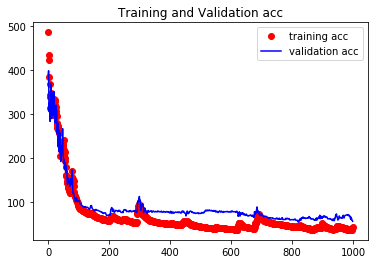

In [35]:
plot_history(history)


In [36]:
test_model(1000,model,15,2)


input [[[388 215]
  [636 155]
  [737 306]
  [761 736]
  [900 368]
  [  1 729]
  [721 703]
  [314 454]
  [509 174]
  [691 149]
  [ 31 379]
  [447 567]
  [350 895]
  [820 525]
  [501 325]]]
result [[  35.23677 1065.2057 ]]


In [0]:
time_steps = 15
num_features = 2
num_samples = 100
upper_bound = 1000
X,Y = generare_batch_data(num_samples,time_steps,num_features,upper_bound)
#validation set is in a different range
X_val,Y_val = generare_batch_data(40,time_steps,num_features,10000)
model2 = Sequential()
model2.add(LSTM(50, activation='relu', input_shape=(time_steps, num_features)))
model2.add(Dense(2))
model2.compile(optimizer='adam', loss='mse',metrics=["mae"])

history = model2.fit(X, Y, epochs=1000, verbose=0, validation_data=(X_val,Y_val))

error values [637.69416016 102.74638306  76.10164917  70.12509705 120.54999847
  68.00061005  63.72391754  56.53757355  44.86054306  42.75052185]


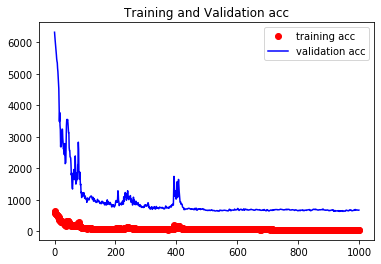

In [38]:
plot_history(history)


In [39]:
test_model(1000,model2,15,2)

input [[[652 920]
  [710 258]
  [437 983]
  [591 482]
  [619  49]
  [301 543]
  [824 505]
  [352 506]
  [134 457]
  [148 909]
  [663 712]
  [485 977]
  [865 154]
  [897 238]
  [341 798]]]
result [[185.54938 644.83966]]


In [0]:
time_steps = 15
num_features = 2
num_samples = 100
upper_bound = 1000
X,Y = generare_batch_data(num_samples,time_steps,num_features,upper_bound)

model3 = Sequential()
model3.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(time_steps, num_features)))
model3.add(LSTM(50, activation='relu', return_sequences=True))
model3.add(LSTM(25, activation='relu'))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(2))
model3.compile(optimizer='adam', loss='mse',metrics=["mae"])

history = model3.fit(X, Y, epochs=500, validation_split=0.2, verbose=0)

error values [792.67363281 296.47498169 116.42660217  75.46988831  67.52264557
  87.26601715  76.32117615  83.15317383  65.43011703  61.33109436]


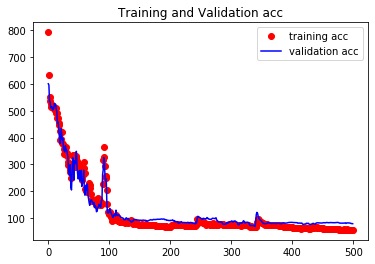

In [42]:
plot_history(history)


In [0]:
time_steps = 15
num_features = 2
num_samples = 100
upper_bound = 1000
X,Y = generare_batch_data(num_samples,time_steps,num_features,upper_bound)
X_val,Y_val = generare_batch_data(40,time_steps,num_features,10000)

model4 = Sequential()
model4.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(time_steps, num_features)))
model4.add(LSTM(50, activation='relu', return_sequences=True))
model4.add(LSTM(25, activation='relu'))
model4.add(Dense(10, activation='relu'))
model4.add(Dense(2))
model4.compile(optimizer='adam', loss='mse',metrics=["mae"])

history = model4.fit(X,Y,  epochs=500, validation_data=(X_val,Y_val), verbose=0)

error values [514.73721924 225.37139648 129.63901672  84.62594849  52.5078302
  46.76524261  36.78643402  44.59625603  30.870811    61.46368866]


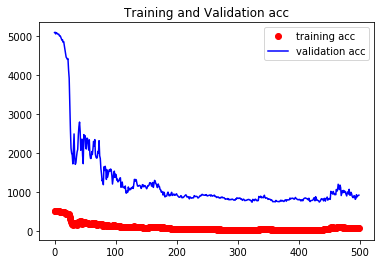

In [45]:
plot_history(history)


In [56]:
print("input",test_input_1K)
print("model1 " )
test_model_with_input(model1,test_input_1K)
print("model2 ")
test_model_with_input(model2,test_input_1K)
print("model3 " )
test_model_with_input(model3,test_input_1K)
print("model4 " )
test_model_with_input(model4,test_input_1K)

input [[[ 40 527]
  [118 188]
  [374 307]
  [157 738]
  [223  15]
  [269 864]
  [586 406]
  [446 352]
  [458 394]
  [914 128]
  [716 396]
  [205 460]
  [ 59 741]
  [291 271]
  [265  40]]]
model1 
result [[ 48.21759 791.6238 ]]
model2 
result [[ 57.060608 784.19836 ]]
model3 
result [[ 53.429996 622.5426  ]]
model4 
result [[ 54.01343 891.37   ]]


In [55]:
print("input",test_input_10K)
print("model1 " )
test_model_with_input(model1,test_input_10K)
print("model2 ")
test_model_with_input(model2,test_input_10K)
print("model3 " )
test_model_with_input(model3,test_input_10K)
print("model4 " )
test_model_with_input(model4,test_input_10K)

input [[[9348 3222]
  [6211 7604]
  [3812 8829]
  [3784 4151]
  [2153 9203]
  [5517  708]
  [ 170 8042]
  [1962 2486]
  [2319  552]
  [8319 4577]
  [4947  104]
  [8535  152]
  [3540 6606]
  [9490 1797]
  [5827 7007]]]
model1 
result [[ 342.05954 7758.4473 ]]
model2 
result [[ 102.73612 9220.832  ]]
model3 
result [[ 1601.4403 12561.631 ]]
model4 
result [[ 653.67566 9743.406  ]]
